## Оглавление
1. [Предобработка данных](#pre_processing)
2. [Анализ данных](#analysis)
  
  2.1. [Соотношение видов объектов общественного питания по количеству](#one)

  2.2. [Cоотношение сетевых и несетевых заведений по количеству](#two)

  2.3. [Cетевое распространение](#three)

  2.4. [Особенность сетевых заведений](#four)

  2.5. [Среднее количество посадочных мест](#five)

  2.6. [Информация об адресе](#six)

  2.7. [Топ-10 улиц по количеству объектов общественного питания](#seven)

  2.8. [Число улиц с одним объектом общественного питания](#eight)

3. [Презентация](#results)

4. [Общий вывод](#sumup)

**Исследование рынка заведений общественного питания в Москве**

Перед открытием небольшого кафе в Москве необходимо провести исследование рынка. Кафе оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Инвесторов интересует текущее положение дел на рынке — сможет ли кафе снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

**Цель исследования** — подготовить исследование рынка на основании открытых данных о заведениях общественного питания в Москве. 

**Ход исследования**

Перед анализом данных понадобится обзор и предобработка данных. Необходимо проверить данные на ошибки и оценить их влияние на исследование.

В итоге мы сделаем общий вывод и дадим рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Также мы прокомментируем возможность развития сети.

Таким образом, исследование пройдёт в четыре этапа:

- Обзор данных и предобработка данных.
- Анализ данных:
  - соотношение видов объектов общественного питания по количеству;
  - соотношение сетевых и несетевых заведений по количеству;
  - вид объекта общественного питания, для которого характерно сетевое распространение;
  - что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
  - среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?
  - график топ-10 улиц по количеству объектов общественного питания; 
  - число улиц с одним объектом общественного питания.
- Презентация.
- Вывод.

## 1. Предобработка данных
<a name="pre_processing"></a>

In [365]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from plotly import graph_objects as go

In [366]:
# изучим данные

try:
    data = pd.read_csv('/datasets/rest_data.csv')
except:
    data = pd.read_csv('/datasets/rest_data.csv')
data.head()


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [367]:
data.info() # выведем сводную информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [368]:
# изменим тип данных для колонки chain на булев
d = {'да': True, 'нет': False}

data['chain'] = data['chain'].map(d)
data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,True,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [369]:
# проверим на аномалии численные столбцы
data.describe()

# смущает число посадочных мест — 1700

,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


In [370]:
# проверим эту строку
data.query('number == 1700')

# это концертная площадка, все в порядке

,id,object_name,chain,object_type,address,number
12723,199696,Arena by Soho Family,False,бар,"город Москва, Кутузовский проспект, дом 36, ст...",1700


In [371]:
# проверим на аномалии столбец object_name
data['object_name'].describe()

count        15366
unique       10393
top       Столовая
freq           267
Name: object_name, dtype: object

In [372]:
# проверим на аномалии столбец chain
data['chain'].unique()

array([False,  True])

In [373]:
# проверим на аномалии столбец object_name
data['object_name'].describe()

count        15366
unique       10393
top       Столовая
freq           267
Name: object_name, dtype: object

In [374]:
# проверим на аномалии столбец object_type
data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [375]:
# проверим на аномалии столбец address
data['address'].describe()

count                                      15366
unique                                      9108
top       город Москва, Ходынский бульвар, дом 4
freq                                          95
Name: address, dtype: object

In [376]:
#проверим на неявные дубликаты
new = data[data.duplicated(subset=['object_name', 'chain', 'object_type', 'address', 'number'])]
display(new) # 82 позиции

# удалим их из таблицы
data = data.drop(new.index, axis = 0)


,id,object_name,chain,object_type,address,number
2381,28611,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,False,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100
3481,20914,Буфет Мади,False,буфет,"город Москва, Ленинградский проспект, дом 64",40
4431,23759,СТОЛОВАЯ ГБОУ города Москвы № 384,False,буфет,"город Москва, Беловежская улица, дом 67",100
4537,23391,Столовая «Комбинат питания КОСМОС»,False,столовая,"город Москва, Новозаводская улица, дом 12/11",15
5059,20021,LIFT,False,кафе,"город Москва, Багратионовский проезд, дом 7, к...",20
...,...,...,...,...,...,...
14578,222932,Старый Баку,False,кафе,"город Москва, Кировоградская улица, владение 15А",120
14596,204947,Буфет при кинотеатре,False,буфет,"город Москва, Ореховый бульвар, дом 22А",0
14844,219518,Sushi-Make,False,предприятие быстрого обслуживания,"город Москва, Ярцевская улица, дом 19",0
15173,218542,Кофе с собой,True,предприятие быстрого обслуживания,"город Москва, Алтуфьевское шоссе, дом 70, корп...",0


In [377]:
# проверим данные на дубликаты
data.duplicated().sum()

0

### Вывод
В данных 15366 строк и 6 столбцов. Также мы заменили тип данных для столбца `chain` на булев. В данных есть объекты с очень большим числом посадочных мест, но после проверки оказалось, что это соответсвует истине. Мы удалили 82 строки дубликатов из таблицы. В столбце `object_name` также присутствуют скрытые дубликаты, разберемся с этим ниже.

## 2. Анализ данных
<a name="analisys"></a>

### Задача 1.
Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.
<a name="one"></a>

In [378]:
objects = data.groupby('object_type', as_index=False).agg({'id':'count'}).sort_values(by='id')
objects = objects.rename(
columns={
'object_type': 'Тип предприятия',
'id': 'Количество',}
)
objects

,Тип предприятия,Количество
5,магазин (отдел кулинарии),273
2,закусочная,349
4,кафетерий,395
1,буфет,577
0,бар,855
6,предприятие быстрого обслуживания,1898
7,ресторан,2282
8,столовая,2584
3,кафе,6071


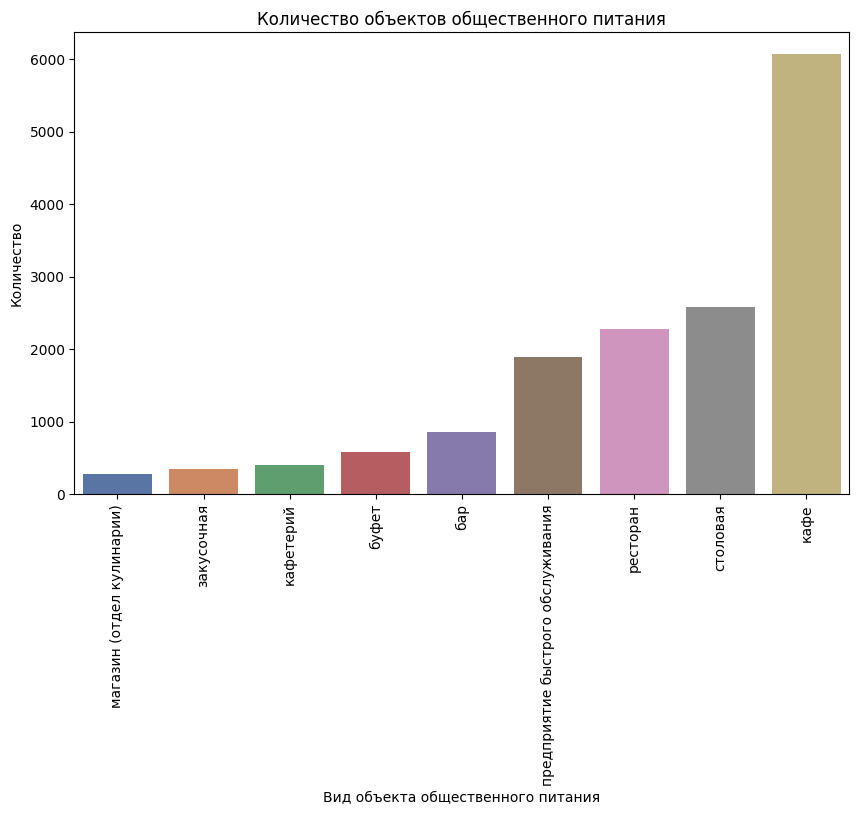

In [405]:
# построим график

plt.figure(
    figsize=(10, 6)
)
sns.set_palette('deep')
ax = sns.barplot(x='Тип предприятия', y='Количество', data=objects)
plt.xticks(rotation=90)
ax.set_title('Количество объектов общественного питания') 
ax.set_xlabel('Вид объекта общественного питания')
ax.set_ylabel('Количество') 
plt.show()

### Вывод

Однозначный лидер — кафе (кафе почти в 2,5 раза больше, чем столовых), за ним следует столовая и ресторан.

### Задача 2.

Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.
<a name="two"></a>

In [380]:
chains = data.groupby('chain', as_index=False).agg({'id':'nunique'})
chains['percent'] = chains['id']/chains['id'].sum()
chains

,chain,id,percent
0,False,12320,0.806072
1,True,2964,0.193928


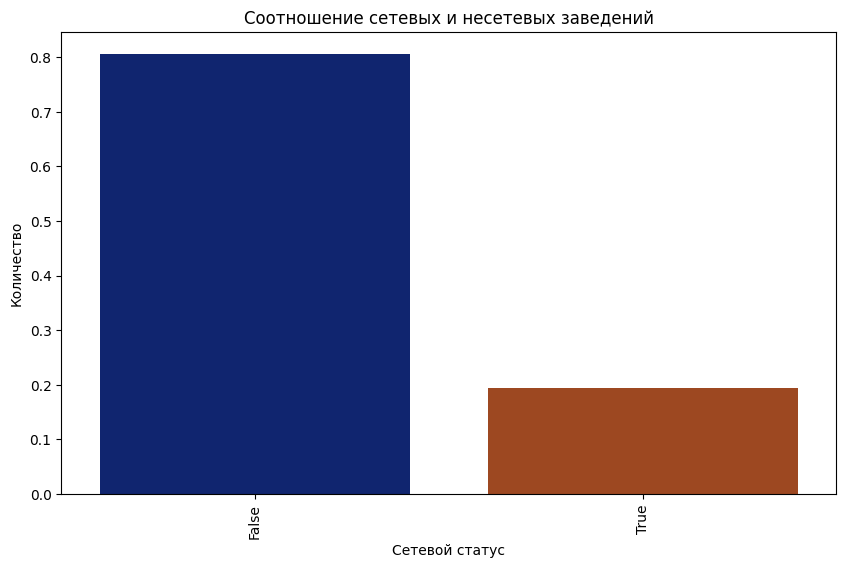

In [404]:
# построим график
plt.figure(
    figsize=(10, 6)
)
sns.set_palette('dark')
ax = sns.barplot(x='chain', y='percent', data=chains)
plt.xticks(rotation=90)
ax.set_title('Соотношение сетевых и несетевых заведений') 
ax.set_xlabel('Сетевой статус')
ax.set_ylabel('Количество') 
plt.show()

### Вывод
Количество несетевых заведений значительно превосходит количество сетевых. Несетевых заведений — почти 81%, а сетевых — 19%.

### Задача 3.
Для какого вида объекта общественного питания характерно сетевое распространение?
<a name="three"></a>

In [382]:
# посчитаем долю сетевых заведений
chain_type = (
    data.groupby('object_type', as_index=False)
    .agg({'id': 'nunique', 'chain': 'mean'})
    .sort_values(by='chain', ascending=False)
)
chain_type


,object_type,id,chain
6,предприятие быстрого обслуживания,1898,0.415174
5,магазин (отдел кулинарии),273,0.285714
7,ресторан,2282,0.237949
3,кафе,6071,0.229946
2,закусочная,349,0.160458
4,кафетерий,395,0.131646
0,бар,855,0.043275
1,буфет,577,0.019064
8,столовая,2584,0.001161


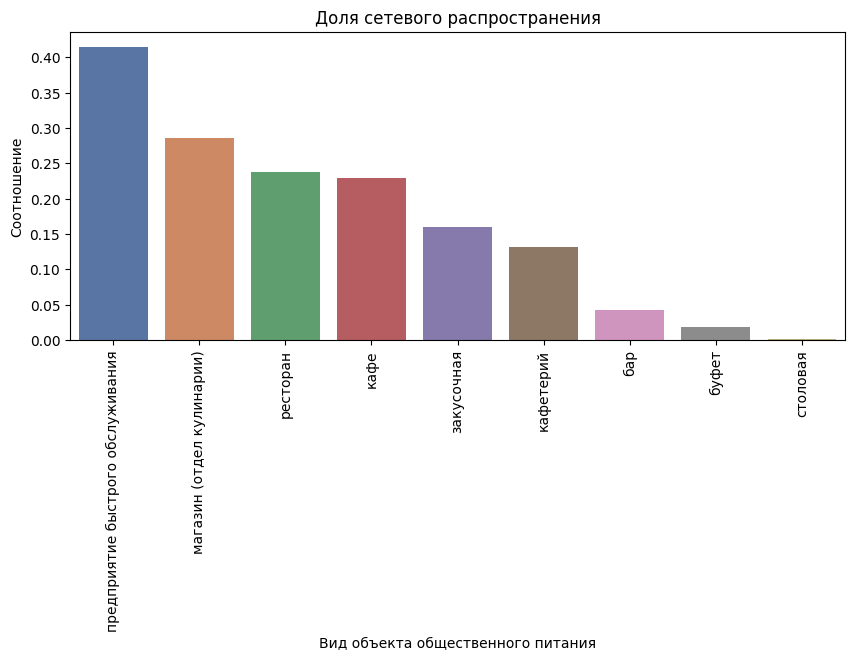

In [383]:
# построим график
plt.figure(
    figsize=(10, 4)
)
sns.set_palette('deep')
ax = sns.barplot(x='object_type', y='chain', data=chain_type)
plt.xticks(rotation=90)
ax.set_title('Доля сетевого распространения') 
ax.set_xlabel('Вид объекта общественного питания')
ax.set_ylabel('Соотношение') 
plt.show()

### Вывод
Явным лидером несетевых заведений является столовая. В топ-3 так же входят буфеты и бары. Что касается сетевых заведений, то наибольшая их доля среди предприятий быстрого обслуживания (41%) и магазинов (28%).

### Задача 4.
Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
<a name="four"></a>

In [384]:
# создадим dataframe со списком сетевых заведений
four = data.query('chain == True')
four = four[['object_name', 'id', 'number']].sort_values(by='number', ascending=False)

In [385]:
# исключим общие названия
four['object_name'] = four['object_name'].str.lower()
four['object_name'] = four['object_name'].str.replace('кафе', '')
four['object_name'] = four['object_name'].str.replace('предприятие быстрого обслуживания', '')
four['object_name'] = four['object_name'].str.replace('закусочная', '')
four['object_name'] = four['object_name'].str.replace('ресторан', '')
four['object_name'] = four['object_name'].str.replace('цех по изготовлению пиццы', '')
four['object_name'] = four['object_name'].str.replace('«', '')
four['object_name'] = four['object_name'].str.replace('»', '')
four['object_name'] = four['object_name'].str.replace('" ', '')
four['object_name'] = four['object_name'].str.replace(' "', '')
four['object_name'] = four['object_name'].str.replace('кофейня', '')
four['object_name'] = four['object_name'].str.replace('пекарня', '')
four['object_name'] = four['object_name'].str.replace('пбо', '')


In [386]:
# заменим неявные дубликаты
def locality(row):
    if 'кинг' in row['object_name']:
        return 'бургер кинг'
    elif 'king' in row['object_name']:
        return 'бургер кинг'
    elif 'андерсон' in row['object_name']:
        return 'андерсон'
    elif 'прайм' in row['object_name']:
        return 'прайм стар'
    elif 'азбука' in row['object_name']:
        return 'азбука вкуса'
    elif 'старбакс' in row['object_name']:
        return 'starbucks'
    elif 'kfc' in row['object_name']:
        return 'kfc'
    elif 'домино' in row['object_name']:
        return 'доминос пицца'
    elif 'крошка' in row['object_name']:
        return 'крошка картошка'
    elif 'баскин' in row['object_name']:
        return 'баскин роббинс'
    elif 'стейк хаус гудман' in row['object_name']:
        return 'стейк хаус гудман'
    elif 'starbucks' in row['object_name']:
        return 'starbucks'
    elif 'теремок' in row['object_name']:
        return 'теремок'
    elif 'subway' in row['object_name']:
        return 'сабвей'
    elif 'сабвей' in row['object_name']:
        return 'сабвей'
    elif 'иль па' in row['object_name']:
        return 'иль патио'
    elif 'чайхона' in row['object_name']:
        return 'чайхона №1'
    elif 'кофе тун' in row['object_name']:
        return 'кофе тун'
    elif 'каравае' in row['object_name']:
        return 'кулинарная лавка братьев караваевых'
    elif 'штолле' in row['object_name']:
        return 'штолле'
    elif 'ян примус' in row['object_name']:
        return 'ян примус'
    elif 'милти' in row['object_name']:
        return 'милти'
    elif 'старина' in row['object_name']:
        return 'старина миллер'
    elif 'му-му' in row['object_name']:
        return 'му-му'
    elif 'ёрш' in row['object_name']:
        return 'ёрш'
    elif 'нияма' in row['object_name']:
        return 'нияма'
    elif 'бульвар' in row['object_name']:
        return 'бакинский бульвар'
    elif 'урюк' in row['object_name']:
        return 'урюк'
    elif 'пилзнер' in row['object_name']:
        return 'пилзнер'
    elif 'темпл бар' in row['object_name']:
        return 'темпл бар'
    elif 'кружка' in row['object_name']:
        return 'кружка'
    elif 'брудер' in row['object_name']:
        return 'брудер'
    elif 'пронто' in row['object_name']:
        return 'пронто'
    elif 'торро гриль' in row['object_name']:
        return 'торро гриль'
    elif 'кофемания' in row['object_name']:
        return 'кофемания'
    elif 'менза' in row['object_name']:
        return 'менза'
    elif 'космик' in row['object_name']:
        return 'космик'
    elif 'ваби-саби' in row['object_name']:
        return 'ваби-саби'
    elif 'золотая вобла' in row['object_name']:
        return 'золотая вобла'
    elif 'колбасофф' in row['object_name']:
        return 'колбасофф'
    elif 'макдоналдс' in row['object_name']:
        return 'макдоналдс'
    elif 'шоколадница' in row['object_name']:
        return 'шоколадница'
    elif 'якитория' in row['object_name']:
        return 'якитория'
    elif 'тануки' in row['object_name']:
        return 'тануки'
    elif 'кофе хаус' in row['object_name']:
        return 'кофе хаус'
    elif 'додо' in row['object_name']:
        return 'додо пицца'
    elif 'стардо' in row['object_name']:
        return 'стардогс'
    return row['object_name']
 
four['object_name'] = four.apply(locality, axis=1)

four['object_name'].unique() # проверим результат

array(['макдоналдс', 'чайхона №1', 'якитория', 'кружка', 'kfc',
       'иль патио', 'грабли', 'корчма тарас бульба', 'темпл бар',
       'бакинский бульвар', 'пилзнер', 'чешская пивная козловица',
       'му-му', 'золотая вобла', 'андерсон', 'ян примус',
       'старина миллер', 'космик', 'пражечка', 'урюк', 'колбасофф',
       'молли гвинз', 'пронто', ' планета суши', 'нияма', 'тануки',
       'территория ясенево', 'сказка', 'академия', 'то да сё', 'теремок',
       'джон джоли', 'гудман', 'брудер', 'две палочки', 'сварня',
       'гурман', 'торро гриль', ' джон джоли', 'кофемания', 'марчеллис',
       'менза', 'гамбринус', 'ваби-саби', 'вареничная №1',
       'пицца экспресс', 'елки-палки', 'шоколадница', 'бургер кинг',
       'руккола', 'white rabbite (белый кролик)', 'ариана', 'кофе хаус',
       'павлин-мавлин', 'япоша', ' то да сё', 'm cafe хинкальная',
       'венеция', 'территория', 'иль-патио', 'да пино', 'ёрш',
       'генацвали', 'гино-но-таки', 'хинкальная', 'прайм стар',
 

In [387]:
#посчитаем для каждой сети чсило посадочных мест и количество объектов
four = four.groupby('object_name', as_index=False).agg({'number':'sum', 'id':'count'}).sort_values(by='id', ascending=False)

four['ratio'] = four['number']/four['id'] # добавим столбец со средним количеством посадочных мест в заведении
four = four.rename(
columns={
'object_name': 'Название сети',
'number': 'seat_count',
'id': 'object_count',}
)

In [388]:
four

,Название сети,seat_count,object_count,ratio
73,kfc,10497,188,55.835106
380,шоколадница,10640,184,57.826087
245,макдоналдс,15054,172,87.523256
139,бургер кинг,7655,159,48.144654
346,теремок,3013,111,27.144144
...,...,...,...,...
128,бб энд бургерс в&в бургер,35,1,35.000000
259,молли гвинз,250,1,250.000000
157,ганс и марта,120,1,120.000000
261,мск московская сеть кальянных на шаболовке,70,1,70.000000


<Figure size 1000x600 with 0 Axes>

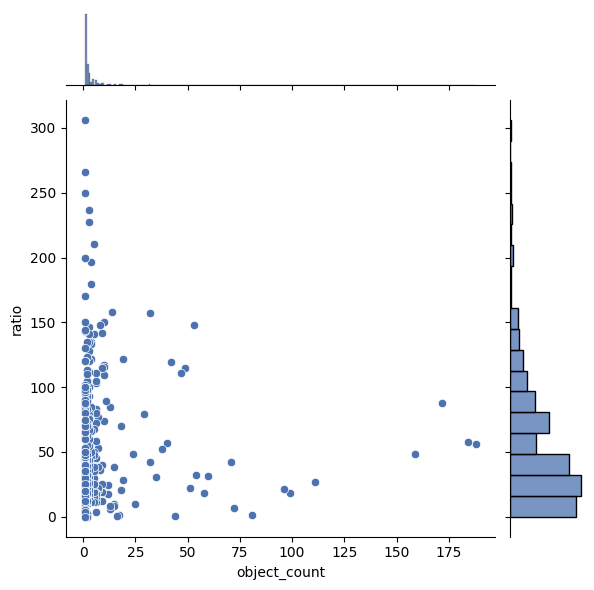

In [389]:
plt.figure(
    figsize=(10, 6)
)
sns.set_palette('deep')
ax = sns.jointplot(x='object_count', y='ratio', data=four)
plt.show()

In [390]:
# проверим, какое число посадочных мест характерно для сетевых заведений
chain_objects = data.query('chain == True')['number']
chain_objects.describe()

count    2964.000000
mean       52.981107
std        57.152817
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number, dtype: float64

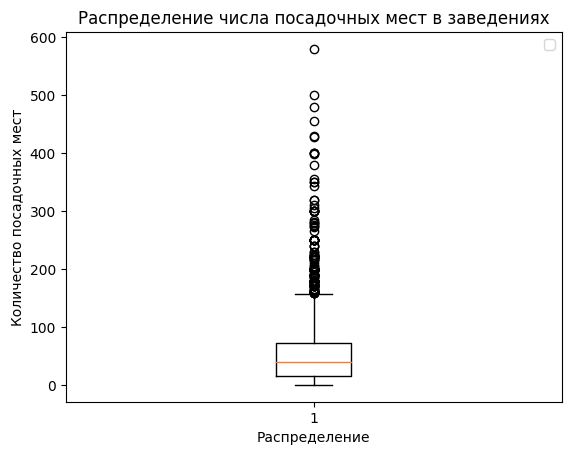

In [391]:
# посмотрим на распределение данных
plt.boxplot(chain_objects)
plt.title("Распределение числа посадочных мест в заведениях")
plt.xlabel("Распределение")
plt.ylabel("Количество посадочных мест")
plt.legend()
plt.show()

In [392]:
# посмотрим на выбросы
np.percentile(chain_objects, [90, 95, 99])

array([120.  , 158.85, 275.37])

Мы видим достаточное количество аномально больших значений. В то же время среднее и медиана достаточно близки по значению и составляют 52 и 40 мест соответственно. 25% процентов заведений имеют более 72 посадочных мест, 5% — более 120 мест, 1% — более 275 мест. Примем границу третьего перцентиля за предел нормального количества посадочных мест, то есть заведения с более чем 72 посадочными местами будем считать объектами с большим количеством мест.

In [393]:
# посмотрим на заведения с большим количеством посадочных мест
by_ratio = four.query('ratio > 72')
display(by_ratio.describe())
# сетей с большим количеством посадочных мест - 115

#посчитаем количество сетей с количеством заведений больше границы 3 перцентиля (4 заведения)

len(by_ratio.query('object_count > 4'))

# 28 сетей

,seat_count,object_count,ratio
count,115.000000,115.000000,115.000000
mean,739.930435,6.608696,114.759081
std,1806.480288,18.218795,43.419206
min,75.000000,1.000000,72.333333
25%,98.000000,1.000000,85.000000
50%,200.000000,2.000000,100.000000
75%,538.500000,4.000000,131.750000
max,15054.000000,172.000000,306.000000


28

In [394]:
# посмотрим на заведения с малым количеством посадочных мест
by_count = four.query('ratio < 72')
display(by_count.describe())

# сетей с малым количеством посадочных мест - 276

#посчитаем количество сетей с количеством заведений больше границы 3 перцентиля (3 заведения)
len(by_count.query('object_count > 3'))

# 68 сетей

,seat_count,object_count,ratio
count,273.000000,273.000000,273.000000
mean,263.003663,8.065934,30.020284
std,1077.883303,23.515859,19.924716
min,0.000000,1.000000,0.000000
25%,22.000000,1.000000,15.000000
50%,48.000000,1.000000,26.000000
75%,95.000000,3.000000,45.000000
max,10640.000000,188.000000,70.055556


68

### Вывод
Для сетевых заведений более характерно наличие большего числа заведений с небольшим числом посадочных мест в каждом, нежели чем малого количества заведений с большим количеством посадочных мест.
Что касается отношения количества посадочных мест и количества заведений одной сети, то зависимость показателей друг от друга не прослеживается.

## Задача 5
Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.
<a name="five"></a>

In [395]:
# посчитаем среднее количество посадочных мест для каждого вида объекта общественного питания
five = data.groupby('object_type', as_index=False).agg({'number':'mean'}).sort_values(by='number', ascending=False)
five

,object_type,number
8,столовая,130.337848
7,ресторан,96.884750
1,буфет,51.509532
0,бар,43.533333
3,кафе,39.785703
6,предприятие быстрого обслуживания,20.808219
4,кафетерий,9.184810
2,закусочная,7.825215
5,магазин (отдел кулинарии),5.589744


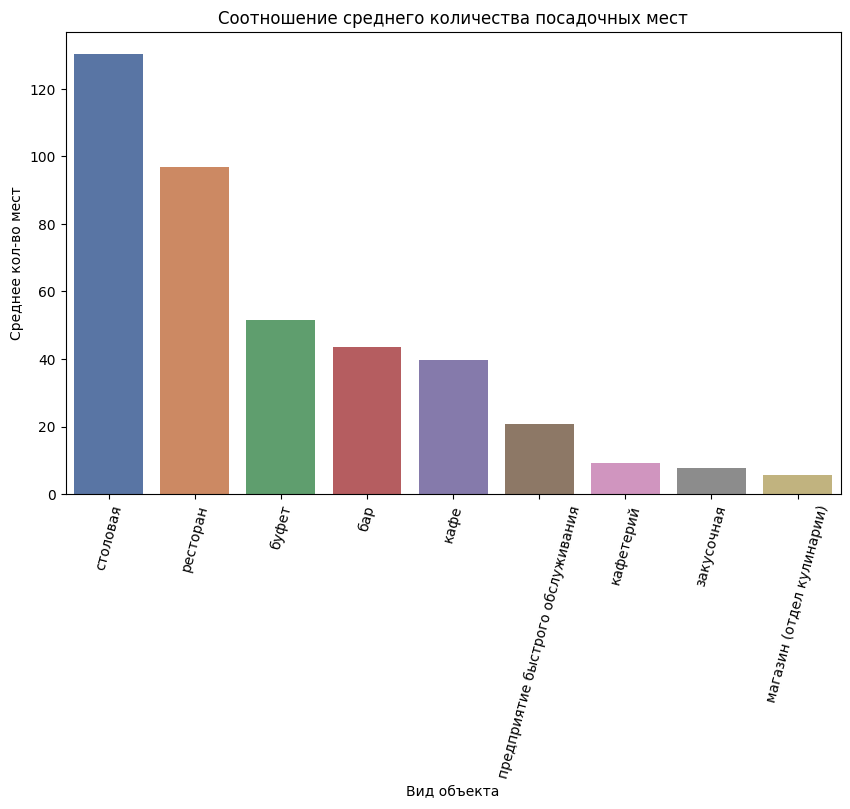

In [396]:
plt.figure(
    figsize=(10, 6)
)
sns.set_palette('deep')
ax = sns.barplot(x='object_type', y='number', data=five)
plt.xticks(rotation=75)
ax.set_title('Соотношение среднего количества посадочных мест') 
ax.set_xlabel('Вид объекта')
ax.set_ylabel('Среднее кол-во мест') 
plt.show()

## Вывод
Самое большое среднее количество посадочных мест предоставляют столовые — 130, далее следуют рестораны (почти 97 мест) и буфет(51 место). Меньше всего мест в кафетериях, закусочных и магазинах — 9, 7 и 5 соответственно. 

## Задача 6
Выделите в отдельный столбец информацию об улице из столбца address.
<a name="six"></a>


In [397]:
# выделим улицу
address = data['address'].str.split(',', expand=True)
display(address[1].head())

# присоединим столбец с улицей в талицу data
data = data.join(address[[1]])
data = data.rename(
columns={
1: 'street',}
)
data.head()

0     улица Егора Абакумова
1          улица Талалихина
2      Абельмановская улица
3        Абрамцевская улица
4        Абрамцевская улица
Name: 1, dtype: object

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,True,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


## Задача 7
Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
<a name="seven"></a>

In [398]:
# откроем таблицу с указанием районов для каждой улицы
sheet_id = "15Ov5Pgyp0Mx_YRos6ysnwxiyNTNXcl4mVurZYbr8UrU"
sheet_name = "data-4275-2022-05-101"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
streets = pd.read_csv(url)

streets = streets.rename(
columns={
'ID': 'id',}
)

#соединим таблицы
new_df = data.merge(streets, on='id', how='left')
new_df.head()

,id,object_name,chain,object_type,address,number,street,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84
0,151635,СМЕТАНА,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,СМЕТАНА,637376221.0,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",PublicPhone:(499) 183-14-10\n\n,48.0,нет,37.714565,55.879002
1,77874,Родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,Родник,637376331.0,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1",PublicPhone:(495) 676-55-35\n\n,35.0,нет,37.673306,55.738239
2,24309,Кафе «Академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,"Кафе ""Академия""",637376349.0,нет,NaN,ресторан,Центральный административный округ,Таганский район,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(495) 662-30-10\n\n,95.0,нет,37.669648,55.735511
3,21894,ПИЦЦЕТОРИЯ,True,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,119365,Кафе «Вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [399]:
# составим список улиц с указанием районов
seven = (
    new_df.groupby('street', as_index=False)
    .agg({'id':'nunique','District':'unique'})
    .sort_values(by='id', ascending=False)
)
seven_top = seven.head(11)
seven_top


,street,id,District
1334,город Зеленоград,232,"[район Савёлки, nan, район Матушкино, район Ст..."
1452,проспект Мира,204,"[Мещанский район, nan, Останкинский район, Але..."
993,Профсоюзная улица,181,"[nan, Академический район, район Черёмушки, ра..."
683,Ленинградский проспект,170,"[nan, район Беговой, район Аэропорт, район Сок..."
979,Пресненская набережная,167,"[nan, Пресненский район]"
407,Варшавское шоссе,161,"[nan, Донской район, Нагорный район, район Чер..."
686,Ленинский проспект,147,"[nan, район Якиманка, Донской район, Гагаринск..."
1419,поселение Сосенское,137,"[поселение Сосенское, nan]"
1449,проспект Вернадского,128,"[nan, Ломоносовский район, район Тропарёво-Ник..."
674,Кутузовский проспект,114,"[nan, район Дорогомилово, район Фили-Давыдково..."


In [400]:
# удалим Зеленоград, это не улица
seven_top = seven_top.drop(labels = [1334],axis = 0)

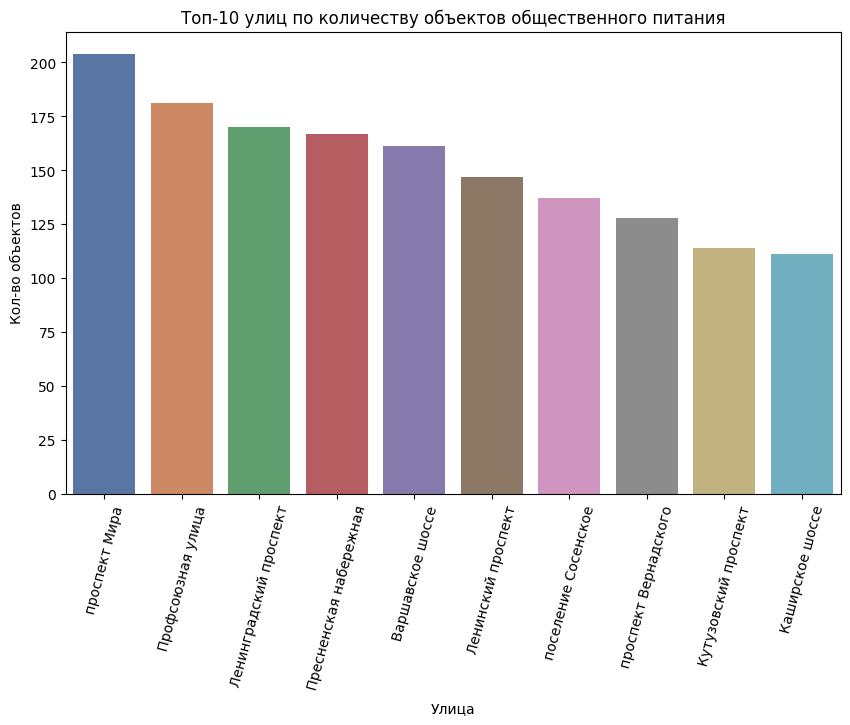

In [403]:
#  построим график

plt.figure(
    figsize=(10, 6)
)
sns.set_palette('deep')
ax = sns.barplot(x='street', y='id', data=seven_top)
plt.xticks(rotation=75)
ax.set_title('Топ-10 улиц по количеству объектов общественного питания') 
ax.set_xlabel('Улица')
ax.set_ylabel('Кол-во объектов') 
plt.show()

### Вывод
Лидер по количеству объектов общественного питания в Москве — проспект Мира, затем следуют Профсоюзная улица и Ленинградский проспект.

## Задача 8
Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
<a name="eight"></a>

In [402]:
# найдем улицы с одним заведением
single = new_df.groupby(['street', 'District'], as_index=False).agg({'id':'nunique'}).sort_values(by='id', ascending=False)
single = single.query('id == 1')
display(len(single)-1) # посчитаем количество улиц с одним объектом общественного питания

# проверим в каких районах находятся эти улицы
single.groupby('District').agg({'id':'sum'}).sort_values(by='id', ascending=False).head(10)

681

,id
District,
Таганский район,37
Басманный район,28
Пресненский район,27
Тверской район,26
район Хамовники,24
район Сокольники,19
Мещанский район,14
район Замоскворечье,12
район Марьина Роща,11


### Вывод
В Москве находится 681 улица с одним объектом общественного питания. Большинство этих улиц находится в Таганском районе, затем следуют Басманный и Пресненский районы.

## 3. Презентация
<a name="results"></a>

### Задача
Подготовьте презентацию исследования для инвесторов. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно обязательно в формате pdf.

Презентация https://disk.yandex.ru/i/RhXcvOhn4hgL0Q

## 4. Общий вывод
<a name="sumup"></a>

Перед открытием небольшого кафе в Москве нам необходимо было провести исследование рынка. Инвесторов интересовало текущее положение дел на рынке — сможет ли кафе с роботами-официантами снискать популярность на долгое время?

Чтобы ответить на эти вопросы, мы исследовали рынок на основании открытых данных о заведениях общественного питания в Москве.

В ходе исследования мы проверили данные на пропуски, аномалии и дубликаты. Затем мы проанализировали соотношение видов объектов общественного питания по количеству, соотношение сетевых и несетевых заведений по количеству; выделили вид объекта общественного питания, для которого характерно сетевое распространение; выяснили, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест; посчитали среднее количество посадочных мест для каждого вида объекта общественного питания; подготовили график топ-10 улиц по количеству объектов общественного питания и нашли число улиц с одним объектом общественного питания.
Также мы подготовили презентацию по проекту.

После обработки и проверки данных мы провели их анализ и сделали следующие выводы:
- Однозначный лидер по количеству объектов — кафе (кафе почти в 2,5 раза больше, чем столовых), за ним следует столовая и ресторан.
- Количество несетевых заведений больше чем в 4 раза превосходит количество сетевых.
- Наибольшая доля сетевых заведений приходится на предприятия быстрого обслуживания (41%) и магазины (28%).
- Для сетевых заведений более характерно наличие большего числа заведений с небольшим числом посадочных мест в каждом, нежели чем малого количества заведений с большим количеством посадочных мест. Что касается отношения количества посадочных мест и количества заведений одной сети, то зависимость показателей друг от друга не прослеживается.
- Самое большое среднее количество посадочных мест предоставляют столовые — 130, далее следуют рестораны (почти 97 мест) и буфет(51 место). Меньше всего мест в кафетериях, закусочных и магазинах — 9, 7 и 5 соответственно.
- Лидер по количеству объектов общественного питания в Москве — проспект Мира, затем следуют Профсоюзная улица и Ленинградский проспект.
- В Москве находится 681 улица с одним объектом общественного питания. Большинство этих улиц находится в Таганском районе, затем следуют Басманный и Пресненский районы.

Общие рекомендации:
- Самый популярный вид заведения в Москве — кафе, соответственно открывать еще один объект данного типа может быть целесообразно.
- Среднее число посадочных мест в заведениях Москвы — 52, а 25% процентов заведений имеют более 72 посадочных мест. Мы предполагаем, что открытие заведения с более чем 72 посадочными местами может быть рискованно для нового формата объекта общественного питания.
- Лучше всего выбрать районы с наибольшим числом улиц с одним объектом общественного питания, чтобы минимизировать конкуренцию:	
  - Таганский район	
  - Басманный район	
  - Пресненский район	
  - Тверской район	
  - район Хамовники.
- Количество несетевых заведений больше чем в 4 раза превосходит количество сетевых в Москве. Кроме того, сеть позволяет сокращать расходы и диверсифицировать риски. Однако нет смысла составлять бизнес-план по развитию сети без анализа работы первого заведения.
